In [5]:
!pip install kaggle
!pip install yfinance

In [67]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [11]:
import tensorflow

In [12]:
data = yf.download('WIPRO.NS')

[*********************100%%**********************]  1 of 1 completed


In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,1.1250,1.1250,1.1250,1.1250,0.908191,19999
1996-01-02,1.0375,1.0375,1.0375,1.0375,0.837554,39999
1996-01-03,1.0750,1.0750,1.0750,1.0750,0.867827,19999
1996-01-04,1.0750,1.0750,1.0750,1.0750,0.867827,119999
1996-01-05,1.0750,1.0750,1.0750,1.0750,0.867827,0


In [14]:
data.describe(include='all')

,Open,High,Low,Close,Adj Close,Volume
count,7121.000000,7121.000000,7121.000000,7121.000000,7121.000000,7.121000e+03
mean,163.542716,165.686821,161.126450,163.341377,153.620197,6.702780e+06
std,140.762823,142.036930,139.230338,140.538295,141.431096,8.246012e+06
min,0.767500,0.767500,0.737500,0.767500,0.622526,0.000000e+00
25%,59.625004,60.825005,58.179379,59.495628,48.852383,2.484430e+06
50%,133.837540,135.843750,131.531281,133.743790,119.010674,4.346692e+06
75%,212.306305,214.893799,210.000046,212.325058,203.160477,7.864266e+06
max,722.750000,739.849976,716.000000,721.500000,711.108215,1.303676e+08


In [15]:
# sns.heatmap(data['Open'].isnull().sum())

In [16]:
data['Open'].isnull().sum()

0

In [17]:
for col in data.columns:
    print(f'{col}',data[col].isnull().sum())

Open 0
High 0
Low 0
Close 0
Adj Close 0
Volume 0


<Axes: ylabel='Open'>

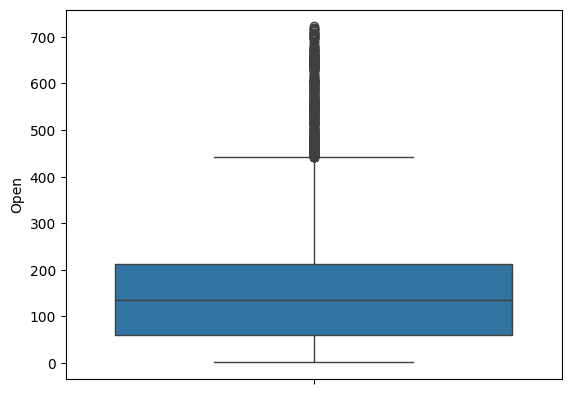

In [18]:
sns.boxplot(data = data, y = 'Open')

In [19]:
import numpy as np
q3 = np.percentile(data['Open'], 75)
q1 = np.percentile(data['Open'], 25)

In [20]:
iqr = q3 - q1
iqr

152.68130111694336

In [21]:
maxx = q3 + 1.5*iqr
minn = q1 - 1.5*iqr

In [22]:
maxx , minn

(441.32825660705566, -169.39694786071777)

In [23]:
data[data['Open'] > maxx].size

2370

In [24]:
data.size

42726

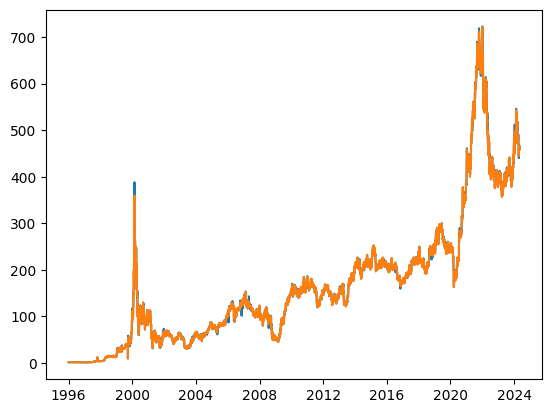

In [25]:
plt.plot(data['Open'])
plt.plot(data['Close'])

In [26]:
df = data.filter(['Open'])

In [27]:
df = np.array(df).reshape(-1, 1)
df.shape

(7121, 1)

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1, 1))
scaled_df

array([[4.95164380e-04],
       [3.73970339e-04],
       [4.25910689e-04],
       ...,
       [6.39395683e-01],
       [6.36625533e-01],
       [6.34409404e-01]])

In [30]:
import math
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

5697

In [35]:
train_data = scaled_df[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    

In [36]:
train_data.shape

(5697, 1)

In [38]:
x_train[0], y_train[0]

(array([0.00049516, 0.00037397, 0.00042591, 0.00042591, 0.00042591,
        0.00042591, 0.0004363 , 0.00042591, 0.00042799, 0.00042591,
        0.00042591, 0.00039128, 0.00039128, 0.00039128, 0.00039821,
        0.00036376, 0.00041899, 0.00038782, 0.00038955, 0.00039128,
        0.00037397, 0.00039128, 0.00037934, 0.00037934, 0.0004086 ,
        0.00042591, 0.00039128, 0.00039128, 0.00039128, 0.00039128,
        0.00042556, 0.00042556, 0.00042556, 0.00042556, 0.00049516,
        0.00049516, 0.00049516, 0.00049516, 0.00049516, 0.00049516,
        0.00049516, 0.00046054, 0.00046071, 0.00049516, 0.00049516,
        0.00046054, 0.00049516, 0.00049516, 0.00049516, 0.00047785,
        0.00048651, 0.00049516, 0.00039146, 0.00039146, 0.00042591,
        0.00044322, 0.00049516, 0.00046071, 0.00046071, 0.00046071]),
 0.0004607105738143498)

In [39]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [41]:
x_train.shape

(5637, 60, 1)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, LSTM, Dense

In [44]:
model = Sequential()
model.add(LSTM(50, return_sequences=50, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(x_train, y_train, batch_size=40, epochs=20)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: 0.0026
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - loss: 1.1567e-04
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 1.3329e-04
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 1.0979e-04
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 8.6342e-05
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 9.3235e-05
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 7.0979e-05
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 8.1235e-05
Epoch 9/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - loss: 6.3211e-05
Epoch 10/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - loss: 6.2224e-05
Epoch 11/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - loss: 6.5495e-05
Epoch 12/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - loss: 6.6244e-05
Epoch 13/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 6.7049e-05
Epoch 14/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/s

In [46]:
test_data = scaled_df[training_data_len-60:, :]
x_test = []
y_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [48]:
x_test[0]

array([0.28580339, 0.28876399, 0.28460876, 0.28201175, 0.27941473,
       0.28481654, 0.28253115, 0.28034966, 0.28097294, 0.28086906,
       0.2823234 , 0.28034966, 0.28460876, 0.28616697, 0.2784798 ,
       0.27318189, 0.27479205, 0.27328577, 0.2742207 , 0.27177951,
       0.2707407 , 0.27203921, 0.27089653, 0.27209116, 0.27053295,
       0.26923444, 0.26606607, 0.267001  , 0.27380517, 0.2737013 ,
       0.27603861, 0.27837592, 0.27645414, 0.27811622, 0.27837592,
       0.27520758, 0.27037712, 0.27006547, 0.26772816, 0.26684518,
       0.26642965, 0.26809174, 0.26528697, 0.26798786, 0.26975384,
       0.27053295, 0.27115623, 0.27162368, 0.27214309, 0.27245474,
       0.27525951, 0.28247922, 0.28195982, 0.28959504, 0.28902369,
       0.29291921, 0.29603563, 0.29603563, 0.29759384, 0.29239981])

In [49]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
predictions = model.predict(x_test)
predictions[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step


array([[0.29120302],
       [0.2876806 ],
       [0.2835973 ],
       [0.28023544],
       [0.27779207]], dtype=float32)

In [52]:
predictions.shape

(1424, 1)

In [54]:
y_test = df[training_data_len:, :]

In [56]:
y_test, y_test.shape

(array([[208.65005493],
        [206.25004578],
        [205.05004883],
        ...,
        [462.3999939 ],
        [460.3999939 ],
        [458.79998779]]),
 (1424, 1))

In [57]:
pred = scaler.inverse_transform(predictions)
rsme = np.sqrt(np.mean(predictions-y_test)**2)
rsme

385.11628402201353

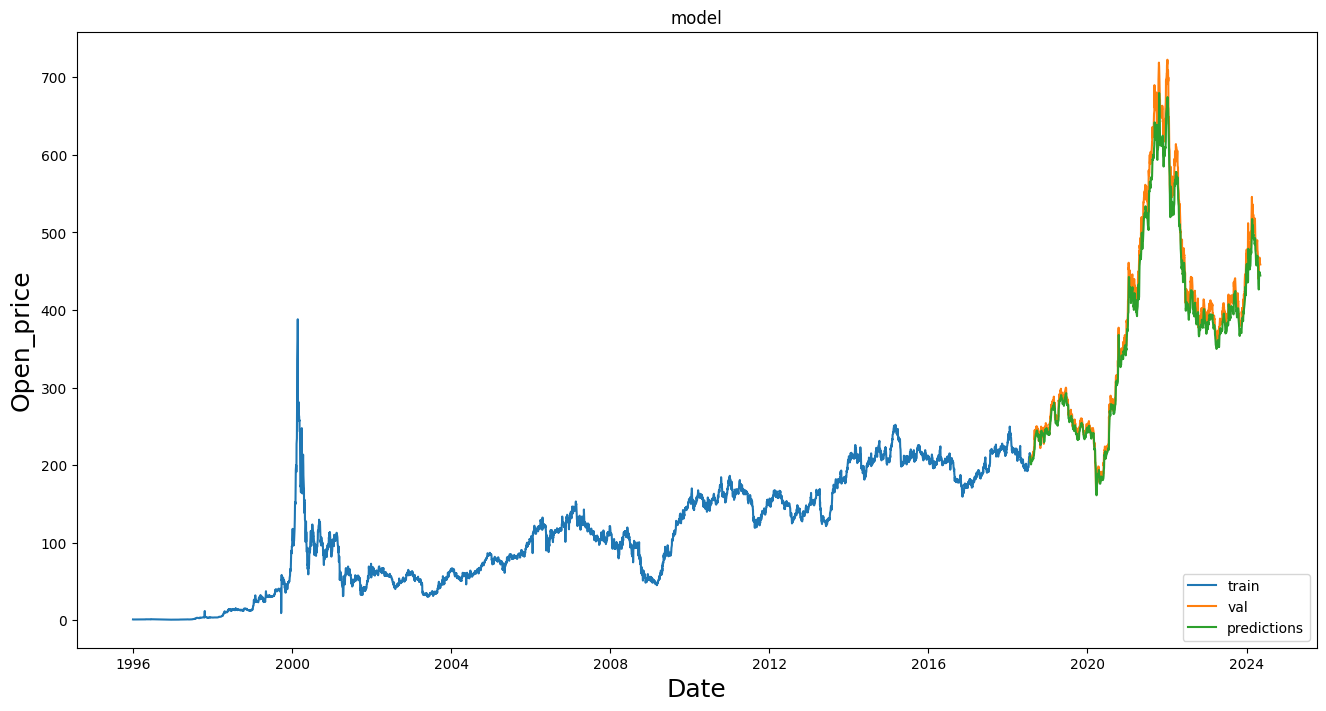

In [68]:
new_df = data.filter(['Open'])
train = new_df[:training_data_len]
val = new_df[training_data_len:]
val['predictions'] = pred
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open_price', fontsize=18)
plt.plot(train['Open'])
plt.plot(val[['Open','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

array([[208.65005493],
       [206.25004578],
       [205.05004883],
       ...,
       [462.3999939 ],
       [460.3999939 ],
       [458.79998779]])